In [2591]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score

In [2592]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

#EDA

In [2593]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2594]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [2595]:
df.shape

(1470, 35)

In [2596]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [2597]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [2598]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [2599]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#Preprocessing

#NULLS

In [2600]:
df.isnull().sum()
#no nulls

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


#Duplicates

In [2601]:
df.duplicated().sum()
#no duplicates

np.int64(0)

#Check unbalace

In [2602]:
df['Attrition'].value_counts() #unblanced

,count
Attrition,
No,1233
Yes,237


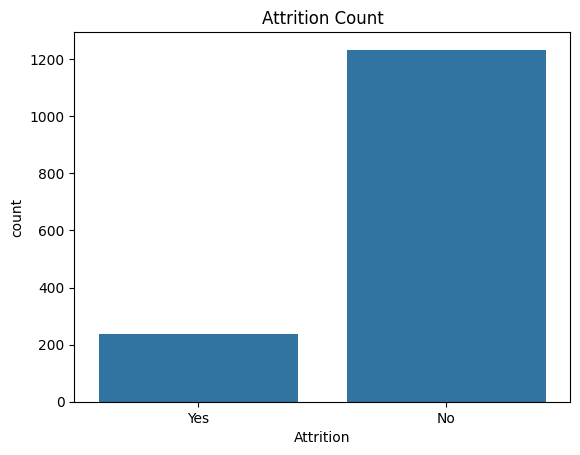

In [2603]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Count')
plt.show()

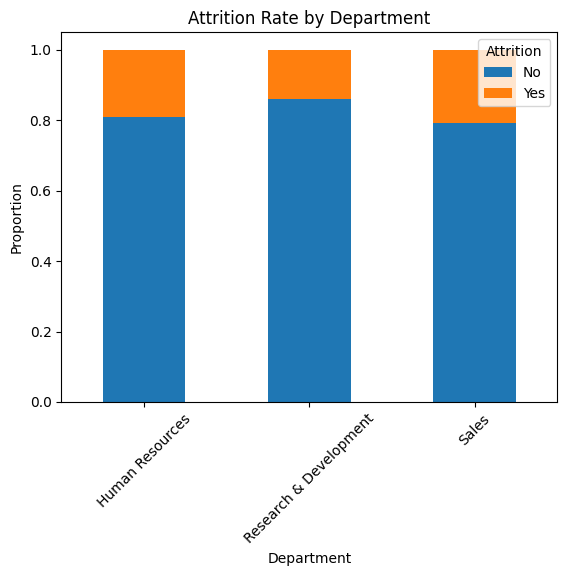

In [2604]:
attrition_by_dept = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack()
attrition_by_dept.plot(kind='bar', stacked=True)
plt.title("Attrition Rate by Department")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="Attrition")
plt.show()


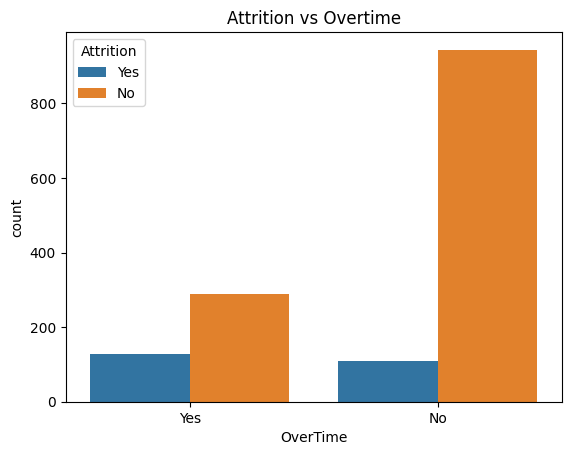

In [2605]:
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("Attrition vs Overtime")
plt.show()


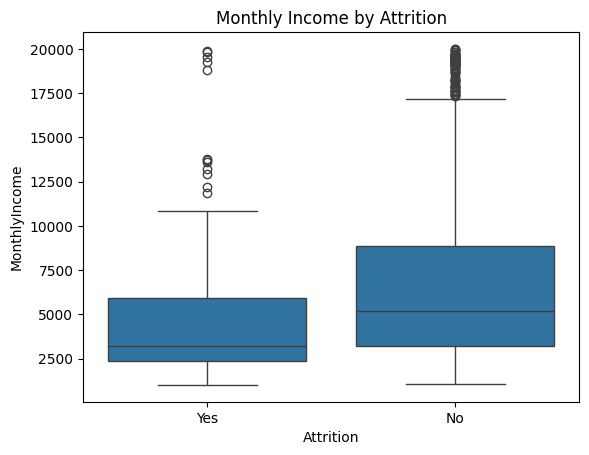

In [2606]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income by Attrition")
plt.show()


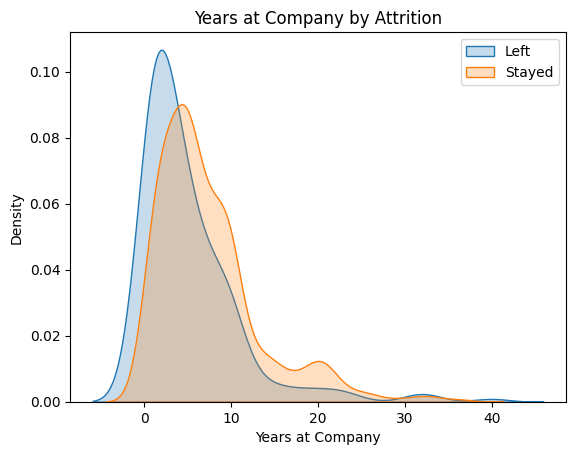

In [2607]:
sns.kdeplot(data=df[df['Attrition'] == 'Yes']['YearsAtCompany'], label='Left', fill=True)
sns.kdeplot(data=df[df['Attrition'] == 'No']['YearsAtCompany'], label='Stayed', fill=True)
plt.title("Years at Company by Attrition")
plt.xlabel("Years at Company")
plt.ylabel("Density")
plt.legend()
plt.show()

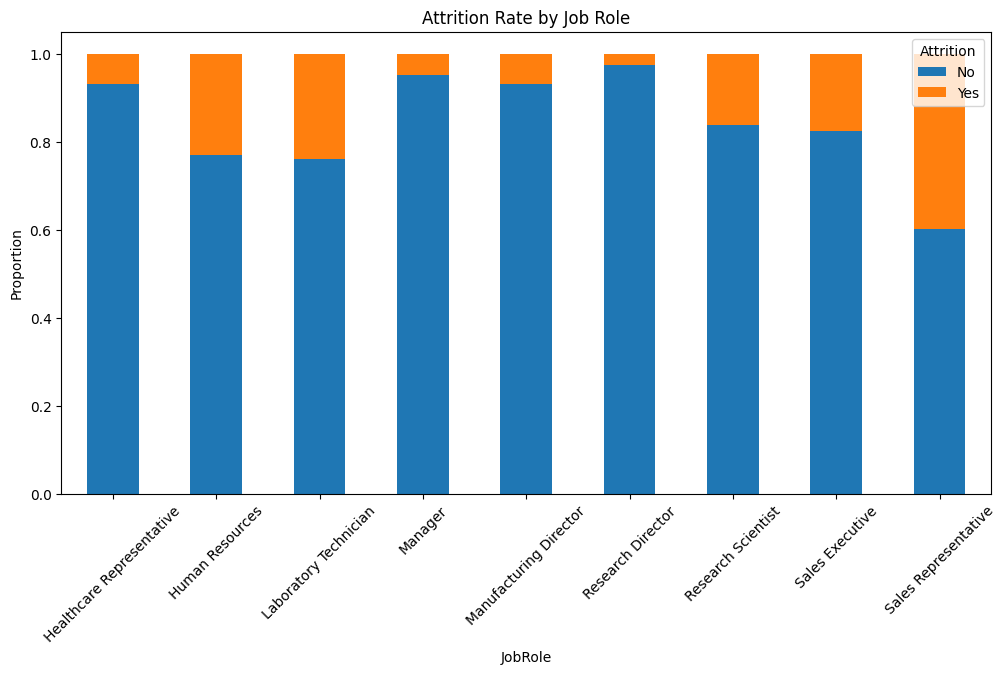

In [2608]:
job_attrition = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack()
job_attrition.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Attrition Rate by Job Role")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="Attrition")
plt.show()


#Outliers

In [2609]:
#check outliers
outlier_counts = {}

for col in df.select_dtypes(include=np.number).columns:
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    lower_outliers = df[df[col] < lower_bound]
    upper_outliers = df[df[col] > upper_bound]
    outliers = len(lower_outliers) + len(upper_outliers)
    outlier_counts[col] = outliers

for col, count in outlier_counts.items():
    print(f"The number of outliers in '{col}': {count}")

The number of outliers in 'Age': 0
The number of outliers in 'DailyRate': 0
The number of outliers in 'DistanceFromHome': 0
The number of outliers in 'Education': 0
The number of outliers in 'EmployeeCount': 0
The number of outliers in 'EmployeeNumber': 0
The number of outliers in 'EnvironmentSatisfaction': 0
The number of outliers in 'HourlyRate': 0
The number of outliers in 'JobInvolvement': 0
The number of outliers in 'JobLevel': 0
The number of outliers in 'JobSatisfaction': 0
The number of outliers in 'MonthlyIncome': 114
The number of outliers in 'MonthlyRate': 0
The number of outliers in 'NumCompaniesWorked': 52
The number of outliers in 'PercentSalaryHike': 0
The number of outliers in 'PerformanceRating': 226
The number of outliers in 'RelationshipSatisfaction': 0
The number of outliers in 'StandardHours': 0
The number of outliers in 'StockOptionLevel': 85
The number of outliers in 'TotalWorkingYears': 63
The number of outliers in 'TrainingTimesLastYear': 238
The number of outl

#Encoding

In [2610]:
df["Attrition"] = [1 if val == "Yes" else 0 for val in df["Attrition"]]

In [2611]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2612]:
df['BusinessTravel'].value_counts()

,count
BusinessTravel,
Travel_Rarely,1043
Travel_Frequently,277
Non-Travel,150


In [2613]:
bt_dummies = pd.get_dummies(df['BusinessTravel'], drop_first=True)
bt_dummies = bt_dummies.astype(int)
df.drop('BusinessTravel', axis=1, inplace=True)
df = pd.concat([df, bt_dummies], axis=1)


In [2614]:
df.head()

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely
0,41,1,1102,Sales,1,2,Life Sciences,1,1,2,...,0,8,0,1,6,4,0,5,0,1
1,49,0,279,Research & Development,8,1,Life Sciences,1,2,3,...,1,10,3,3,10,7,1,7,1,0
2,37,1,1373,Research & Development,2,2,Other,1,4,4,...,0,7,3,3,0,0,0,0,0,1
3,33,0,1392,Research & Development,3,4,Life Sciences,1,5,4,...,0,8,3,3,8,7,3,0,1,0
4,27,0,591,Research & Development,2,1,Medical,1,7,1,...,1,6,3,3,2,2,2,2,0,1


In [2615]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [2616]:
bt_dummies = pd.get_dummies(df['Department'], drop_first=True)
bt_dummies = bt_dummies.astype(int)
df.drop('Department', axis=1, inplace=True)
df = pd.concat([df, bt_dummies], axis=1)


In [2617]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely,Research & Development,Sales
0,41,1,1102,1,2,Life Sciences,1,1,2,Female,...,0,1,6,4,0,5,0,1,0,1
1,49,0,279,8,1,Life Sciences,1,2,3,Male,...,3,3,10,7,1,7,1,0,1,0
2,37,1,1373,2,2,Other,1,4,4,Male,...,3,3,0,0,0,0,0,1,1,0
3,33,0,1392,3,4,Life Sciences,1,5,4,Female,...,3,3,8,7,3,0,1,0,1,0
4,27,0,591,2,1,Medical,1,7,1,Male,...,3,3,2,2,2,2,0,1,1,0


In [2618]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [2619]:
bt_dummies = pd.get_dummies(df['EducationField'], drop_first=True)
bt_dummies = bt_dummies.astype(int)
df.drop('EducationField', axis=1, inplace=True)
df = pd.concat([df, bt_dummies], axis=1)


In [2620]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   DailyRate                 1470 non-null   int64 
 3   DistanceFromHome          1470 non-null   int64 
 4   Education                 1470 non-null   int64 
 5   EmployeeCount             1470 non-null   int64 
 6   EmployeeNumber            1470 non-null   int64 
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

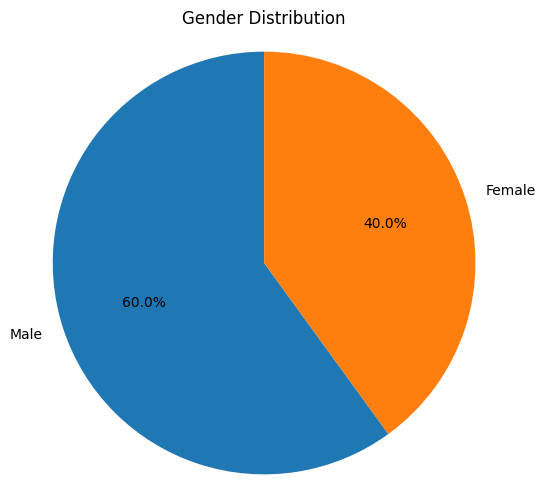

In [2621]:
import matplotlib.pyplot as plt
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()


In [2622]:
df["Gender"] = [1 if val == "Female" else 0 for val in df["Gender"]]

In [2623]:
df.dtypes

,0
Age,int64
Attrition,int64
DailyRate,int64
DistanceFromHome,int64
Education,int64
EmployeeCount,int64
EmployeeNumber,int64
EnvironmentSatisfaction,int64
Gender,int64
HourlyRate,int64


In [2624]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

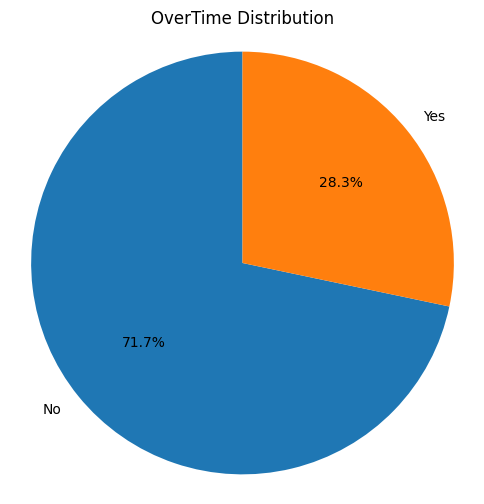

In [2625]:
OverTime_counts = df['OverTime'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(OverTime_counts, labels=OverTime_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('OverTime Distribution')
plt.axis('equal')
plt.show()


In [2626]:
df["OverTime"] = [1 if val == "Yes" else 0 for val in df["OverTime"]]

In [2627]:
df['Over18'].value_counts()

/usr/local/lib/python3.11/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,count
Over18,
Y,1470


In [2628]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Over18'] = le.fit_transform(df['Over18'])


In [2629]:
df.dtypes

,0
Age,int64
Attrition,int64
DailyRate,int64
DistanceFromHome,int64
Education,int64
EmployeeCount,int64
EmployeeNumber,int64
EnvironmentSatisfaction,int64
Gender,int64
HourlyRate,int64


In [2630]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [2631]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])

In [2632]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [2633]:
le = LabelEncoder()
df['JobRole'] = le.fit_transform(df['JobRole'])


In [2634]:
df.dtypes

,0
Age,int64
Attrition,int64
DailyRate,int64
DistanceFromHome,int64
Education,int64
EmployeeCount,int64
EmployeeNumber,int64
EnvironmentSatisfaction,int64
Gender,int64
HourlyRate,int64


In [2635]:
df.shape

(1470, 41)

<Axes: >

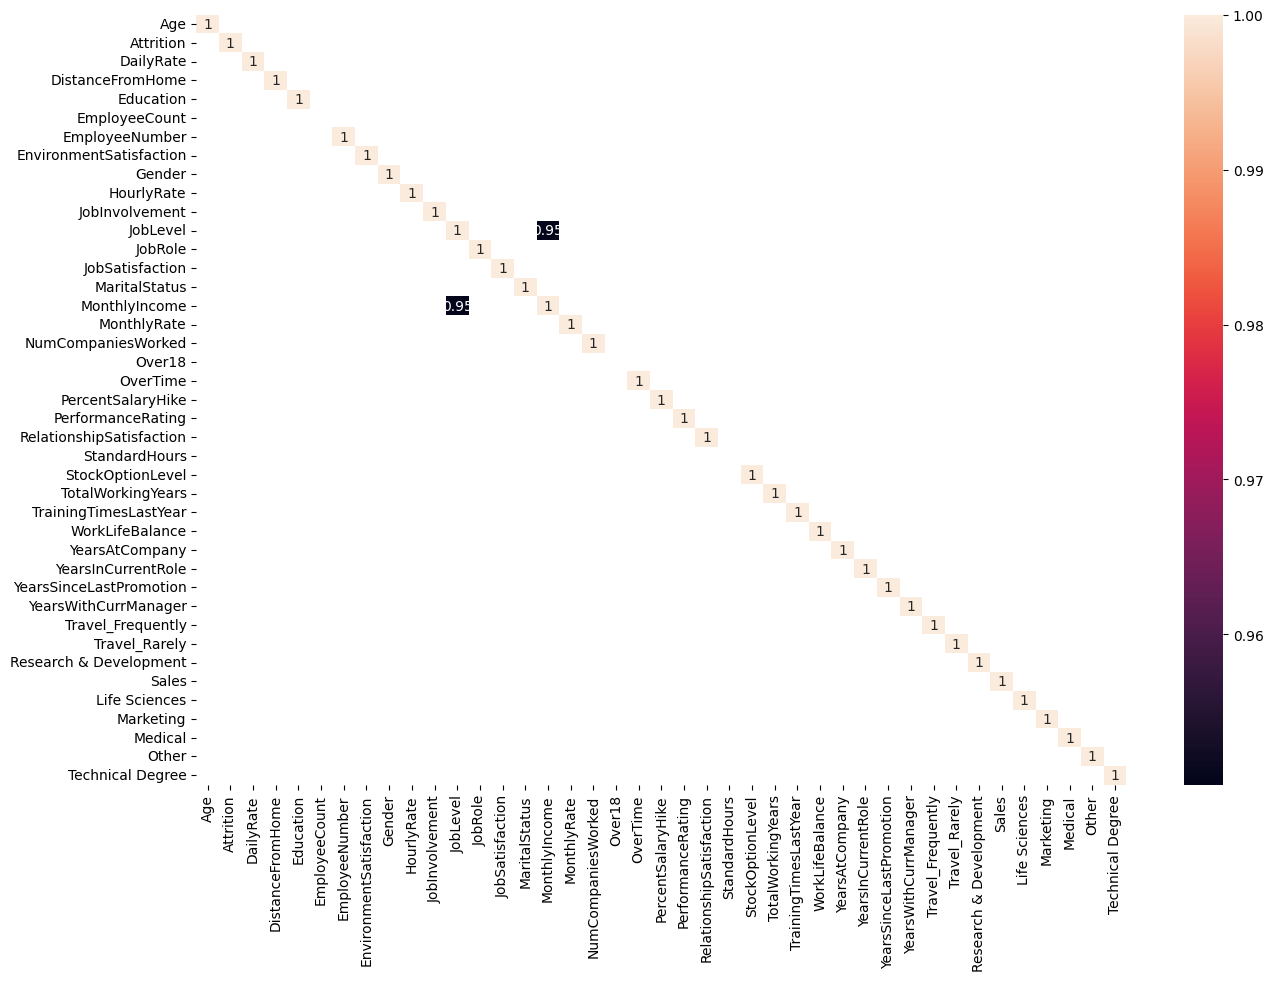

In [2636]:
import seaborn as sns
correlation = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True , mask=correlation <.85)

In [2637]:
df.drop(['JobLevel', 'EmployeeCount', 'EmployeeNumber'], axis=1, inplace=True)

In [2638]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

In [2639]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [2640]:
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

x shape: (1470, 37)
y shape: (1470,)


In [2641]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=10)
x_train_selected = selector.fit_transform(X_train, y_train)
x_test_selected = selector.transform(X_test)
selected_columns = X_train.columns[selector.get_support()]
print(selected_columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate',
       'OverTime', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager'],
      dtype='object')


In [2642]:
from imblearn.over_sampling import SMOTE

from collections import Counter
smote_tomek = SMOTE(random_state=42)
x_smote, y_smote = smote_tomek.fit_resample(x, y)
print(Counter(y_smote))

Counter({1: 1233, 0: 1233})


In [2643]:
x_smote_train, x_smote_test, y_smote_train, y_smote_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)
x_smote_train, x_smote_val, y_smote_train, y_smote_val = train_test_split(x_smote_train, y_smote_train, test_size=0.1, random_state=42)

In [2644]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
pipe_smt = Pipeline([
     ('select',SelectKBest(score_func=f_regression)),
     ('knn',KNeighborsClassifier())
     ])

params_smt = {
    'select__k': [5, 8, 10, 12, 15,20,25,30,50],
    'knn__n_neighbors': [3, 5, 7, 9,11,13,17,20],
    'knn__p': [1, 2]
}



In [2645]:
grid_search_smt = GridSearchCV(pipe_smt, param_grid=params_smt, cv=5, scoring='f1')
grid_search_smt.fit(x_smote_train, y_smote_train)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=50 is greater than n_features=37. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=50 is greater than n_features=37. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=50 is greater than n_features=37. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=50 is greater than n_features=37. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=50 is greater than n_features=37. All the features will be returned.
  warnings.warn(
/usr/local/lib/

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('select',
                                        SelectKBest(score_func=<function f_regression at 0x7873f8adade0>)),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 17, 20],
                         'knn__p': [1, 2],
                         'select__k': [5, 8, 10, 12, 15, 20, 25, 30, 50]},
             scoring='f1')

In [2646]:
grid_search_smt.best_params_

{'knn__n_neighbors': 9, 'knn__p': 1, 'select__k': 8}

In [2647]:
best_model_smt = grid_search_smt.best_estimator_

In [2648]:
y_smote_train_pred = best_model_smt.predict(x_smote_train)
y_smote_val_pred = best_model_smt.predict(x_smote_val)
y_smote_test_pred = best_model_smt.predict(x_smote_test)

In [2649]:
train_accuracy_smt = accuracy_score(y_smote_train, y_smote_train_pred)
val_accuracy_smt = accuracy_score(y_smote_val, y_smote_val_pred)
test_accuracy_smt = accuracy_score(y_smote_test, y_smote_test_pred)

In [2650]:
print("Train Accuracy:", train_accuracy_smt)
print("Validation Accuracy:", val_accuracy_smt)
print("Test Accuracy:", test_accuracy_smt)


Train Accuracy: 0.8370913190529876
Validation Accuracy: 0.8282828282828283
Test Accuracy: 0.7935222672064778


In [2651]:
train_f1 = f1_score(y_smote_train, y_smote_train_pred)
test_f1  = f1_score(y_smote_test, y_smote_test_pred)

print(f"F1 Score: {train_f1:.4f}")
print(f"F1 Score: {test_f1:.4f}")

F1 Score: 0.8432
F1 Score: 0.7992


In [2652]:
############ i will use bagging parallel with decision tree

In [2653]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2654]:
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=30,
    random_state=42
)

In [2655]:
bagging_model.fit(x_smote_train, y_smote_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=30,
                  random_state=42)

In [2656]:
y_pred_bagging = bagging_model.predict(x_smote_test)
y_train_bagging = bagging_model.predict(x_smote_train)

print("acc in train: ", accuracy_score(y_smote_train,y_train_bagging))
print("acc in test : ", accuracy_score(y_smote_test, y_pred_bagging))

acc in train:  1.0
acc in test :  0.9068825910931174


In [2657]:
from sklearn.metrics import confusion_matrix, classification_report
print("Conf Matrix:\n", confusion_matrix(y_smote_test, y_pred_bagging))
print("Classification Report:\n ", classification_report(y_smote_test, y_pred_bagging))

Conf Matrix:
 [[236  14]
 [ 32 212]]
Classification Report:
                precision    recall  f1-score   support

           0       0.88      0.94      0.91       250
           1       0.94      0.87      0.90       244

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494



In [ ]:
# !pip install gradio
# import gradio as gr
# selected_features = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate',
#                     'OverTime', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
#                     'YearsWithCurrManager']

# def predict_attrition(age, daily_rate, distance_from_home, monthly_income, monthly_rate,
#                       overtime, total_working_years, years_at_company, years_in_current_role,
#                       years_with_curr_manager):
#     input_data = pd.DataFrame({
#         'Age': [age],
#         'DailyRate': [daily_rate],
#         'DistanceFromHome': [distance_from_home],
#         'MonthlyIncome': [monthly_income],
#         'MonthlyRate': [monthly_rate],
#         'OverTime': [1 if overtime == "Yes" else 0],
#         'TotalWorkingYears': [total_working_years],
#         'YearsAtCompany': [years_at_company],
#         'YearsInCurrentRole': [years_in_current_role],
#         'YearsWithCurrManager': [years_with_curr_manager]
#     })

#     for col in x_smote_train.columns:
#         if col not in input_data.columns:
#             input_data[col] = 0
#     input_data = input_data[x_smote_train.columns]
#     prediction = bagging_model.predict(input_data)[0]
#     return "Likely to leave" if prediction == 1 else "Likely to stay"
# iface = gr.Interface(
#     fn=predict_attrition,
#     inputs=[
#         gr.Number(label="Age"),
#         gr.Number(label="Daily Rate"),
#         gr.Number(label="Distance From Home (miles)"),
#         gr.Number(label="Monthly Income ($)"),
#         gr.Number(label="Monthly Rate"),
#         gr.Radio(["Yes", "No"], label="Works Overtime?"),
#         gr.Number(label="Total Working Years"),
#         gr.Number(label="Years at Company"),
#         gr.Number(label="Years in Current Role"),
#         gr.Number(label="Years With Current Manager")
#     ],
#     outputs="text",
#     title="HR Attrition Prediction",
#     description="Predict whether an employee is likely to leave the company based on key factors.",

# )

# iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://140d5d95bb0f1aba3f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#FINALLY!!!!!!!!!!